<a href="https://colab.research.google.com/github/stephenbeckr/convex-optimization-class/blob/master/utilities/APPM5630_utilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example driver for using the Python utilities

Shows how to use `firstOrderMethods` in the [`utilities`](https://github.com/stephenbeckr/convex-optimization-class/tree/master/utilities) folder on github

Can be used for HW 10

Stephen Becker for APPM 5630 Advanced Convex Optimization, CU Boulder

In [18]:
import numpy as np
from scipy import linalg
from numpy.linalg import norm
import cvxpy as cvx

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [8,6] # or 7, 4 or 10,8
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.markersize"] = 4
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'font.size': 20})
%reload_ext autoreload
%autoreload 2

In [19]:
#!wget -nv 'https://github.com/stephenbeckr/convex-optimization-class/raw/master/utilities/firstOrderMethods.py'

from firstOrderMethods import gradientDescent, lassoSolver, createTestProblem, runAllTestProblems
from secondOrderMethods import NewtonsMethod

Creating test problem for problem type 2
Iter.  Objective Stepsize  Error
-----  --------- --------  -------
    0  1.55e+01  1.69e-02  9.07e-01
  205  3.08e-02  1.49e+02  2.18e-08
Iter 205 Quitting due to stagnating objective value
Iter.  Objective Stepsize  Error
-----  --------- --------  -------
    0  7.08e+00  1.00e+00  8.22e-01
    1  2.54e+00  1.00e+00  7.13e-01
    2  9.68e-01  1.00e+00  6.08e-01
    3  3.77e-01  1.00e+00  5.05e-01
    4  1.53e-01  1.00e+00  4.06e-01
    5  7.04e-02  1.00e+00  3.11e-01
    6  4.13e-02  1.00e+00  2.10e-01
    7  3.26e-02  1.00e+00  1.07e-01
    8  3.09e-02  1.00e+00  2.99e-02
    9  3.08e-02  1.00e+00  2.46e-03
   10  3.08e-02  1.00e+00  1.79e-05
   11  3.08e-02  1.00e+00  1.00e-09
Quitting due to stagnating objective value


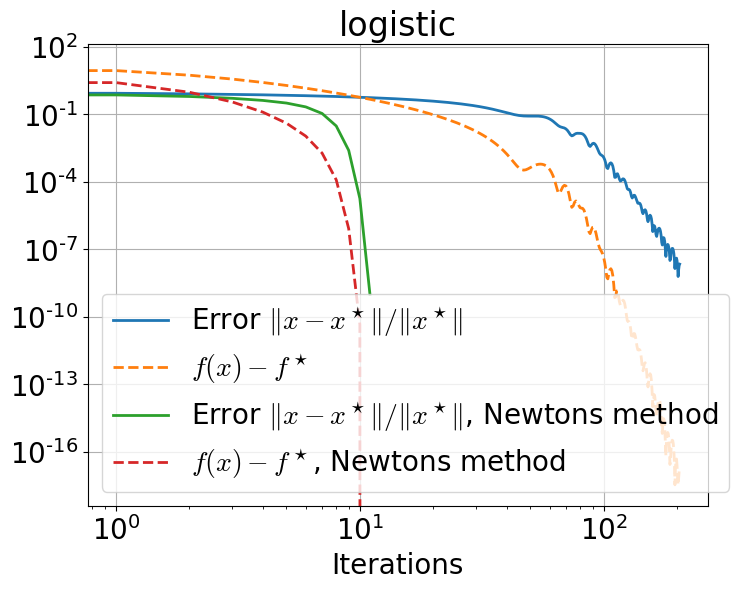

In [39]:
# Try some test problems
problemNumber = 2
rng = np.random.default_rng(1)
data_Newton = None
if problemNumber == 0:
  prob = createTestProblem( 'quadratic', rng=rng )
  xTrue = prob['xTrue']
  errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
  x0  = np.zeros(prob['n'])
  L   = prob['L']
  xNew, data = gradientDescent(prob['f'],prob['grad'],x0,stepsize=1/L,printEvery=None,
                  errorFunction = errFcn, tol=1e-15, saveHistory=True, 
                  linesearch = True,acceleration=True,restart=100,maxIters=2000)
elif problemNumber == 1:
  prob = createTestProblem( 'lasso', rng=rng )
  xTrue = prob['xTrue']
  errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
  x0  = np.zeros(prob['n'])
  L   = prob['L']
  xNew, data = gradientDescent(prob['f'],prob['grad'],x0,prox=prob['prox'],
                  prox_obj=prob['prox_obj'], stepsize=1/L,printEvery=None,
                  errorFunction = errFcn, tol=1e-20, saveHistory=True, 
                  linesearch=True,acceleration=False,restart=50,c=1e-6)
elif problemNumber == 2 or problemNumber == 3:
  prob = createTestProblem( problemNumber, rng=rng ) # logistic
  # case 2 is logistic with a unique solution, using CVXPY to find it
  # case 3 is logistic with an interpolating solution, might have other solutions, doesn't need CVXPY
  xTrue = prob['xTrue']
  errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
  x0  = np.zeros(prob['n'])
  L   = prob['L']
  xNew, data = gradientDescent(prob['f'],prob['grad'],x0,
                  stepsize=1/L,printEvery=None,maxIters=None,
                  errorFunction = errFcn, tol=1e-20, saveHistory=True, 
                  linesearch=True,acceleration=True,restart=None)
  
  xNew_Newton, data_Newton = NewtonsMethod( prob['f'],prob['grad'],prob['Hess'],
                                           x0,errorFunction=errFcn, tol=1e-10,
                                           saveHistory=True,maxIters=100)

## Plot the results
if prob['unique_soln']:
  plt.semilogy( data['errHistory'], '-', label='Error $\|x-x^\star\|/\|x^\star\|$')
plt.semilogy(  data['fcnHistory']-prob['fTrue'] , '--', label='$f(x)-f^\star$')
if data_Newton is not None:
  if prob['unique_soln']:
    plt.semilogy( data_Newton['errHistory'], '-', label='Error $\|x-x^\star\|/\|x^\star\|$, Newtons method')
  plt.semilogy(  data_Newton['fcnHistory']-prob['fTrue'] , '--', label='$f(x)-f^\star$, Newtons method')
  plt.xscale("log")
# plt.plot( data['fcnHistory']-prob['fTrue'], '-', label='$f(x)-f^\star$')
plt.grid(True)
plt.xlabel('Iterations')
plt.legend()
plt.title(prob['name'])
plt.show()

In [40]:
# Test out the lasso solver
rng = np.random.default_rng(1)
prob = createTestProblem( 'lasso', rng=rng )
xTrue = prob['xTrue']
errFcn= lambda x : norm(x-xTrue)/norm(xTrue)
x0  = np.zeros(prob['n'])
xNew, data = lassoSolver(prob['A'],prob['b'],prob['tau'],errorFunction=errFcn,
                         linesearch=True,acceleration=True,tol=1e-18,restart=100)
      
print(f"Error in x: {errFcn(xNew):.2e}, after {data['steps']} steps")

Creating test problem for problem type lasso
10
Reached tolerance after 3 iterations.
Iter.  Objective Stepsize  Error
-----  --------- --------  -------
    0  8.07e+02  1.22e-02  1.83e+01
  308  1.02e+00  1.07e-01  2.69e-06
Iter 308 Quitting due to stagnating objective value
Error in x: 2.69e-06, after 308 steps


In [43]:
runAllTestProblems()

Creating test problem for problem type 0
Problem type: quadratic (underdetermined)

  (Linesearch: False  Nesterov acceleration: False )
  Error in x: 5.15e-04, after 2660 steps
  Stopping flag is: Quitting due to stagnating objective value

  (Linesearch: False  Nesterov acceleration: True )
  Error in x: 2.61e-05, after 281 steps
  Stopping flag is: Quitting due to stagnating objective value

  (Linesearch: True  Nesterov acceleration: False )
  Error in x: 5.11e-04, after 981 steps
  Stopping flag is: Quitting due to stagnating objective value

  (Linesearch: True  Nesterov acceleration: True )
  Error in x: 2.28e-05, after 266 steps
  Stopping flag is: Quitting due to stagnating objective value

Creating test problem for problem type 1
Problem type: lasso

  (Linesearch: False  Nesterov acceleration: False )
  Error in x: 2.70e-04, after 169 steps
  Stopping flag is: Quitting due to stagnating objective value

  (Linesearch: False  Nesterov acceleration: True )
  Error in x: 7.05e-